<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-perpetual-bar-object" data-toc-modified-id="Load-perpetual-bar-object-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load perpetual bar object</a></span></li><li><span><a href="#Resample-time-series" data-toc-modified-id="Resample-time-series-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Resample time series</a></span><ul class="toc-item"><li><span><a href="#Define-parameters" data-toc-modified-id="Define-parameters-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Define parameters</a></span></li><li><span><a href="#Define-resampler" data-toc-modified-id="Define-resampler-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Define resampler</a></span></li><li><span><a href="#Mark-buckets" data-toc-modified-id="Mark-buckets-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Mark buckets</a></span><ul class="toc-item"><li><span><a href="#Inspect-Volume" data-toc-modified-id="Inspect-Volume-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Inspect Volume</a></span></li><li><span><a href="#Fit-buckets" data-toc-modified-id="Fit-buckets-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Fit buckets</a></span></li></ul></li><li><span><a href="#Aggregate-buckets" data-toc-modified-id="Aggregate-buckets-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Aggregate buckets</a></span><ul class="toc-item"><li><span><a href="#Resample" data-toc-modified-id="Resample-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Resample</a></span></li><li><span><a href="#add-sigma_VWAP" data-toc-modified-id="add-sigma_VWAP-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>add sigma_VWAP</a></span></li><li><span><a href="#Diagnostic" data-toc-modified-id="Diagnostic-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Diagnostic</a></span></li><li><span><a href="#Drop-bars-with-zero-volume" data-toc-modified-id="Drop-bars-with-zero-volume-2.4.4"><span class="toc-item-num">2.4.4&nbsp;&nbsp;</span>Drop bars with zero volume</a></span></li></ul></li></ul></li><li><span><a href="#Explore-Volume-Buckets" data-toc-modified-id="Explore-Volume-Buckets-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Explore Volume Buckets</a></span><ul class="toc-item"><li><span><a href="#Volume" data-toc-modified-id="Volume-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Volume</a></span></li><li><span><a href="#Duration" data-toc-modified-id="Duration-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Duration</a></span></li><li><span><a href="#Histograms-of-all-Columns" data-toc-modified-id="Histograms-of-all-Columns-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Histograms of all Columns</a></span></li></ul></li><li><span><a href="#Save-volume-buckets" data-toc-modified-id="Save-volume-buckets-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Save volume buckets</a></span></li></ul></div>

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

/home/cqc5/anaconda3/envs/tensorflow_cpu/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
from cqcplot import *
from arrow_utils import datatypes as dtypes

/home/cqc5/anaconda3/envs/tensorflow_cpu/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/cqc5/anaconda3/envs/tensorflow_cpu/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/home/cqc5/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Load perpetual bar object

In [4]:
bar = pd.read_pickle('../clean_data/bar_obj_perpetual_ts_5S.pickle')

# drop the first minute of the day

# Resample time series

## Define parameters

In [5]:
BUCKET_SIZE=50

## Define resampler

In [6]:
rs = dtypes.CountResampler(bar)

2018-08-08 15:47:48,510 - arrow_utils.datatypes.Resampler - __init__ - WARNING - Bar.df is being referenced to self.df and therefore it may be modified during the resampling


## Mark buckets

### Inspect Volume

In [7]:
bar.df.query('Volume>0')['Volume'].quantile([0.01,0.05,0.1, 0.5, 0.9, 0.95,0.99])

0.01      1.0
0.05      1.0
0.10      1.0
0.50      5.0
0.90     31.0
0.95     50.0
0.99    120.0
Name: Volume, dtype: float64

2018-08-08 15:47:54,898 - matplotlib.font_manager - findfont - DEBUG - findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=medium:stretch=normal:size=11.661999999999999 to DejaVu Sans ('/home/cqc5/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.145000
2018-08-08 15:47:54,952 - matplotlib.font_manager - findfont - DEBUG - findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=medium:stretch=normal:size=14.0 to DejaVu Sans ('/home/cqc5/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.145000


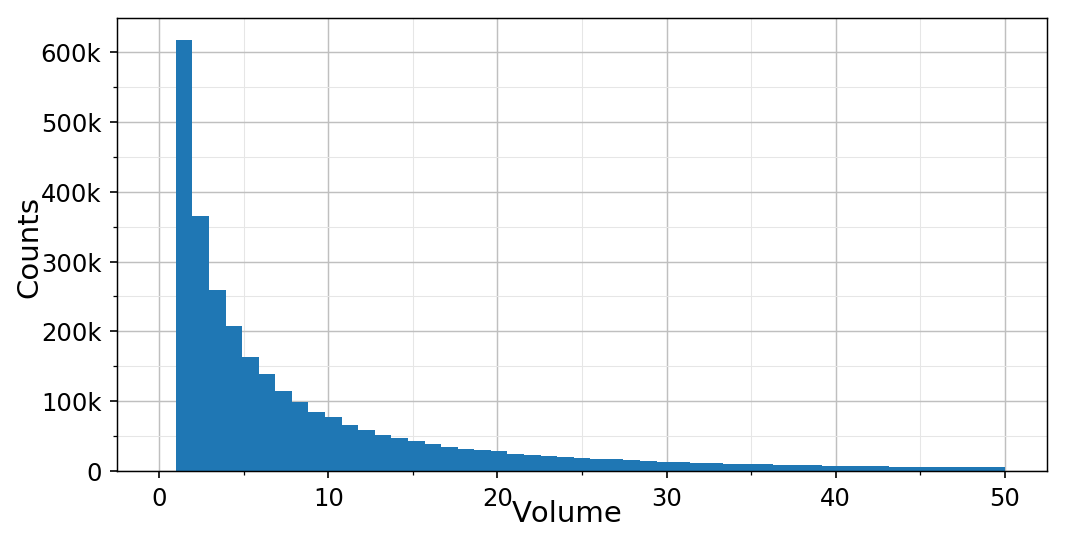

In [8]:
# inspect volume traded in 5s
p = hist_plot(bar.df.query('Volume>0').sample(frac=0.2), 'Volume', var_range = [0,50], bins=51, figsize=(8,4))

### Fit buckets

In [9]:
rs.fit_resampler(count_column='Volume', bucket_size=BUCKET_SIZE)

2018-08-08 15:47:56,468 - arrow_utils.datatypes.Resampler - fit_resampler - INFO - Calculating Volume buckets IDs with minimum size 50...


## Aggregate buckets

### Resample

In [10]:
rs.resample(additional_value_weighted_agg={'VWAP': 'Volume', 'VWAP2': 'Volume'})

2018-08-08 15:48:03,802 - arrow_utils.datatypes.Resampler - transform - INFO - The following default aggregation methods will be assumed:
OrderedDict([('Open', 'first'), ('High', 'max'), ('Low', 'min'), ('Close', 'last'), ('Volume', 'sum'), ('TickCount', 'sum'), ('DateTime', ['first', 'last'])])
2018-08-08 15:48:03,803 - arrow_utils.datatypes.Resampler - transform - INFO - The following default value aggregation methods will be assumed:
OrderedDict([('VWAP', 'Volume'), ('VWAP2', 'Volume')])
2018-08-08 15:48:08,771 - arrow_utils.datatypes.Resampler - resample - WARNING - This way of calculating the beginning and end time of the bucket may not be safe if the database is not completed with all the missing bars i.e. it does not have a homogeneous ts index. See function docstring for more info.
2018-08-08 15:48:08,772 - arrow_utils.datatypes.Resampler - _fit_weighted_agg - WARNING - Default value-weighted aggregation methods is being overridden by [('VWAP', 'Volume'), ('VWAP2', 'Volume')]
2

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'TickCount', 'VWAP2Volume',
       'VWAPVolume', 'bucket_start', 'bucket_end'],
      dtype='object')


In [11]:
volume_bar = rs.get_resampled_bar()

2018-08-08 15:48:23,448 - arrow_utils.datatypes.Bar - __init__ - INFO - self.df is the copy of the input df and can be safely modified


### add sigma_VWAP

In [12]:
volume_bar.df['sigma_VWAP'] = np.sqrt(np.round(volume_bar.df['VWAP2'] - volume_bar.df['VWAP'] ** 2, 12))
volume_bar.df['sigma_VWAP'] = volume_bar.df['sigma_VWAP'].fillna(0)

### Diagnostic

In [13]:
volume_bar.df['bucket_duration_seconds'] = volume_bar.df['bucket_duration'].dt.total_seconds()+5

### Drop bars with zero volume

In [14]:
volume_bar.df = volume_bar.df.query('Volume>0')

# Explore Volume Buckets

## Volume

In [15]:
volume_bar.df['Volume'].quantile([0.01,0.05,0.1, 0.5, 0.9, 0.95,0.99])

0.01     50.0
0.05     50.0
0.10     51.0
0.50     60.0
0.90    110.0
0.95    145.0
0.99    270.0
Name: Volume, dtype: float64

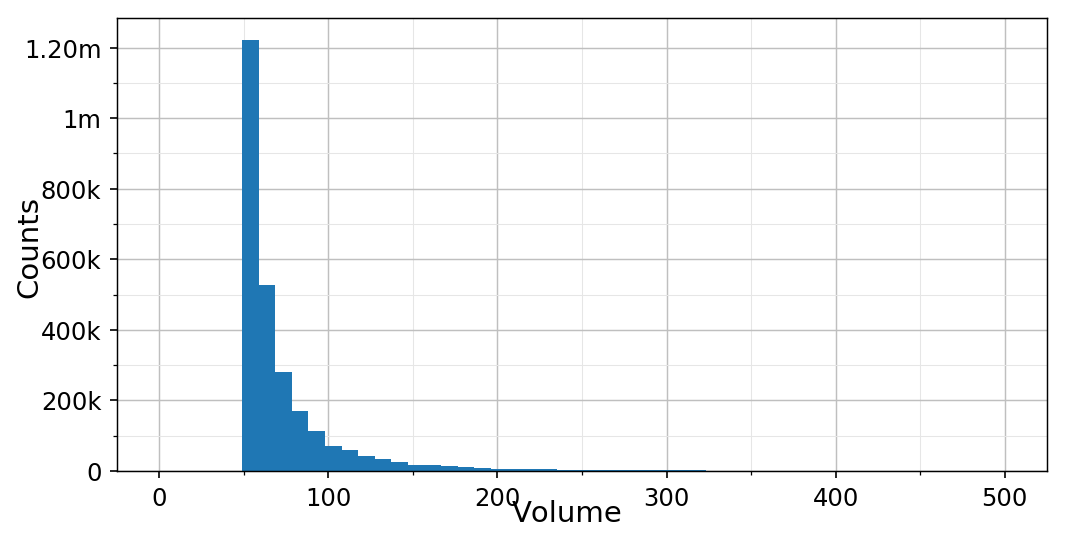

In [16]:
p = hist_plot(volume_bar.df, 'Volume', var_range = [0,500], bins=51, figsize=(8,4))

## Duration

In [17]:
volume_bar.df['bucket_duration_seconds'].quantile([0.01,0.05,0.1, 0.5, 0.9, 0.95,0.99])

0.01      5.0
0.05      5.0
0.10      5.0
0.50     25.0
0.90    100.0
0.95    170.0
0.99    755.0
Name: bucket_duration_seconds, dtype: float64

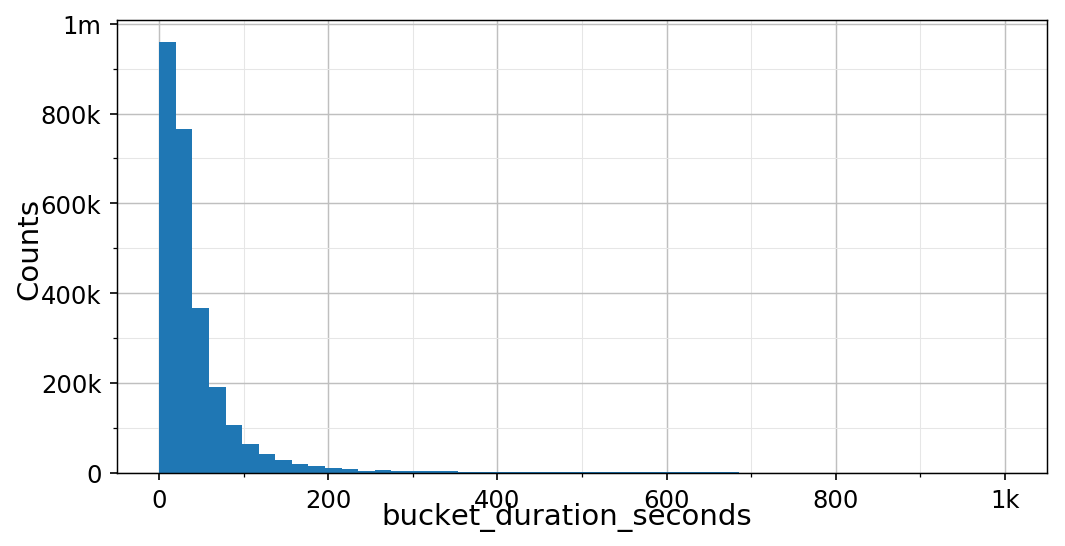

In [18]:
p = hist_plot(volume_bar.df, 'bucket_duration_seconds', var_range = [0,1000], bins=51, figsize=(8,4))

## Histograms of all Columns

In [19]:
numeric_cols = volume_bar.df.dtypes\
                 .to_frame('type')\
                 .reset_index()   
numeric_cols['type'] = numeric_cols['type'].astype(str)
numeric_cols = numeric_cols.query('type in ["float64", "int64"]')['index'].tolist()

numeric_cols = list(set(numeric_cols) - set(['year']))

/home/cqc5/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/cqcplot/variable_histogram.py:28: UserWarning: Quantile based outlier detection produced overlapping bin edges. Will use all data
  warnings.warn('Quantile based outlier detection produced overlapping bin edges. Will use all data')
2018-08-08 15:48:33,121 - matplotlib.font_manager - findfont - DEBUG - findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=medium:stretch=normal:size=5.8309999999999995 to DejaVu Sans ('/home/cqc5/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.145000
2018-08-08 15:48:33,167 - matplotlib.font_manager - findfont - DEBUG - findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=medium:stretch=normal:size=7.0 to DejaVu Sans ('/home/cqc5/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.145000


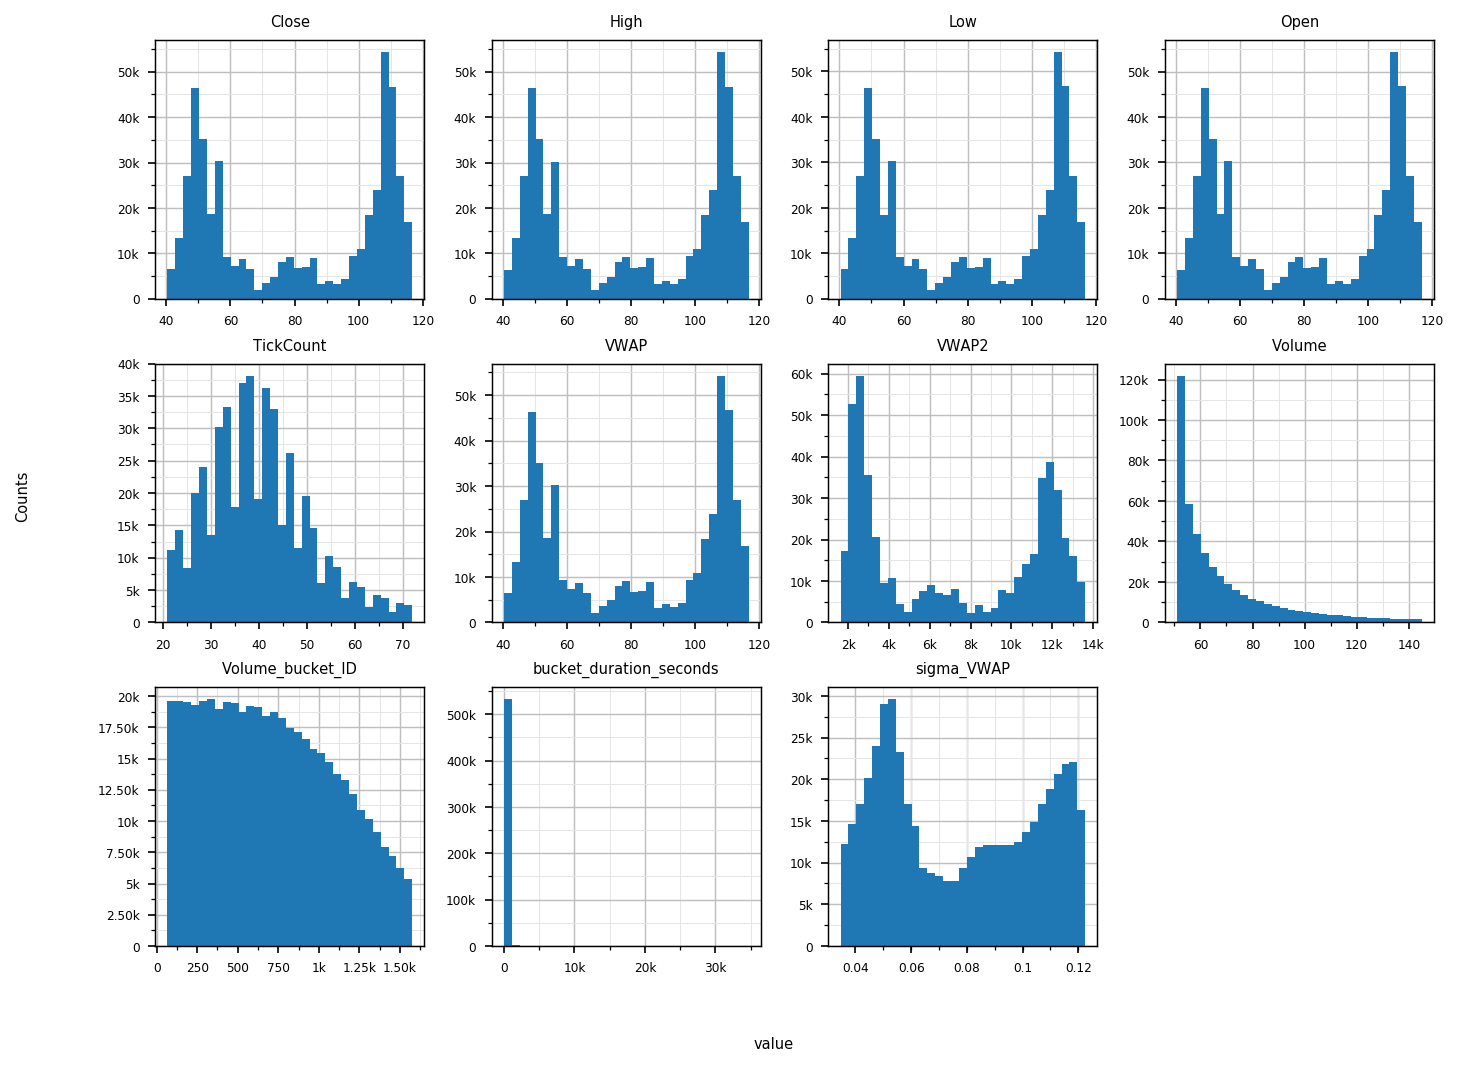

In [20]:
p = variable_histogram(volume_bar.df[numeric_cols].sample(frac=0.2), numeric_cols, outlier_perc=0.05, ncols=4, bins=31, figsize=(11,8), fontsize=7)

# Save volume buckets

In [21]:
volume_bar.to_pickle('./../clean_data/bar_obj_volume{}_perpetual_ts.pickle'.format(BUCKET_SIZE))